In [39]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib notebook
import seaborn

In [100]:
#key = 'CHRIS/CME_CL1' #oil
key = 'CHRIS/LIFFE_Z1' #ftse
key = 'CHRIS/CBOE_VX1'
key = 'CHRIS/CME_C1' #corn

quandl.ApiConfig.api_key = 'EQ9ZF3vhfxxAYyQxW6Ea'
data = quandl.get(key, start_date='2000-02-12', end_date='2019-02-12')

In [106]:
price = data.Settle

<IPython.core.display.Javascript object>


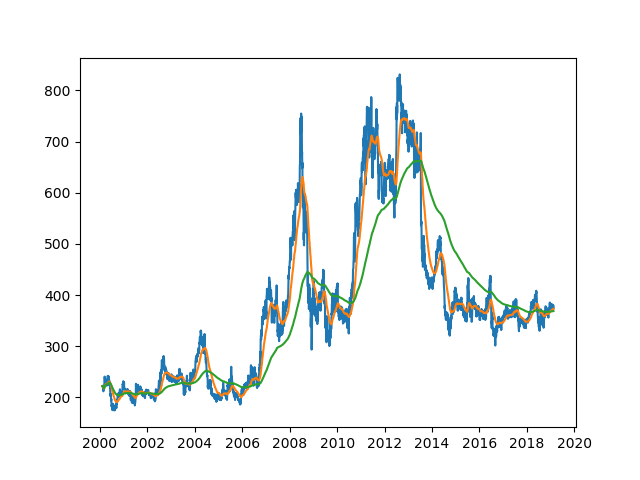

In [107]:
plt.figure()
plt.plot(price)
ewma1 = price.ewm(halflife = 30).mean()
plt.plot(ewma1)
ewma2 = price.ewm(halflife = 200).mean()
plt.plot(ewma2)

In [108]:
returns = price.pct_change(1)
mean = returns.mean()

def calc_strat_weight(a,b,price=price):
    ewma_a = price.ewm(halflife = a).mean()
    ewma_b = price.ewm(halflife = b).mean()

    diff = ewma_a - ewma_b
    weight = diff
    weight [diff<=0] = -1
    weight [diff>0] = 1
    return weight

params = list(range(1,61))
sharpe_matrix = np.zeros((len(params),len(params)))

for i,a in enumerate(params):
    for j,b in enumerate(params):
        if a==b:
            sharpe = 0
        else:
            weights = calc_strat_weight(a=a,b=b)
            strat_returns = returns*weights
            sharpe = (strat_returns.mean()-mean)/strat_returns.std()
        #if np.abs(sharpe)<2:
        #    sharpe_matrix[i,j] = 0
        #else:
            sharpe_matrix[i,j] = sharpe
    



<IPython.core.display.Javascript object>


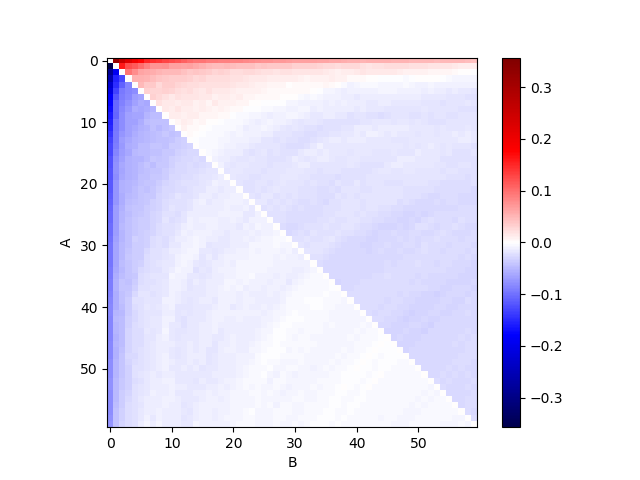

In [109]:
maxiumum = np.max(np.abs(sharpe_matrix))
plt.figure()
plt.imshow(sharpe_matrix,vmax=maxiumum,vmin=-maxiumum,cmap='seismic')
plt.ylabel('A')
plt.xlabel('B')
plt.show()
plt.colorbar()

<IPython.core.display.Javascript object>


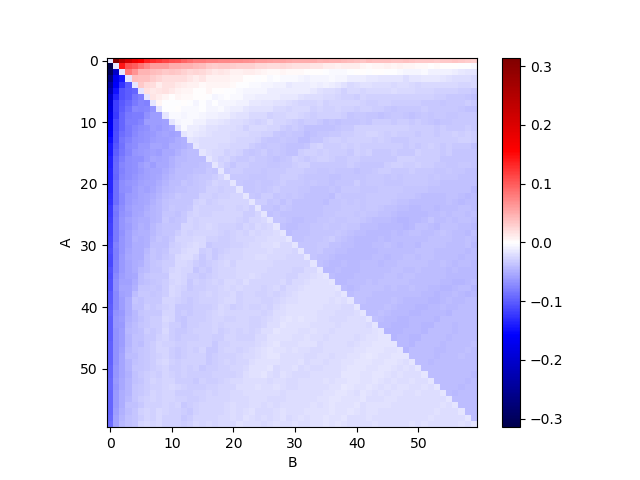

In [104]:
sharpe_matrix_corrected = sharpe_matrix - returns.mean()/returns.std()
plt.figure()
plt.imshow(sharpe_matrix_corrected,vmax=maxiumum,vmin=-maxiumum,cmap='seismic')
plt.ylabel('A')
plt.xlabel('B')
plt.show()
plt.colorbar()

In [105]:
#how to do a proper t test?